# Итоговая работа по Математике

## 1. Импорт библиотек

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

import scipy.stats as sts
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
from scipy.stats import ks_2samp
from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler
from scipy. stats import boxcox 

import matplotlib.pyplot as plt
import mplcyberpunk
import plotly.express as px

In [2]:
plt.style.use("cyberpunk")

## 2. Чтение данных

[Ссылка на датасет](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data)

In [3]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## 3. EDA

### Посмотрим на распределения данных относительно некоторых групп

#### 1. Door Number

Text(0.5, 1.0, 'столбец doornumber')

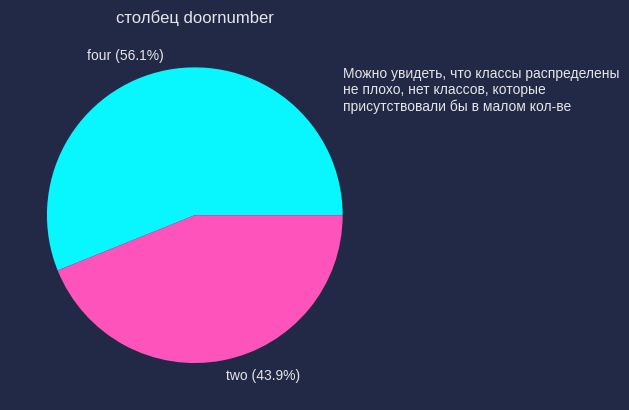

In [6]:
pie_vals_dependents = list(zip(data['doornumber'].value_counts().index, round(data['doornumber'].value_counts(normalize=True) * 100, 2).values))

plt.pie(
    data['doornumber'].value_counts(), 
    labels=[i[0] + f" ({i[1]}%)" for i in pie_vals_dependents]
)
text_for_pie_plot = """
Можно увидеть, что классы распределены
не плохо, нет классов, которые 
присутствовали бы в малом кол-ве
"""
plt.text(1, 0.6, text_for_pie_plot)
plt.title('столбец doornumber')

##### Распределения цены

Посмотрим на то, как распределена цена относительно группы

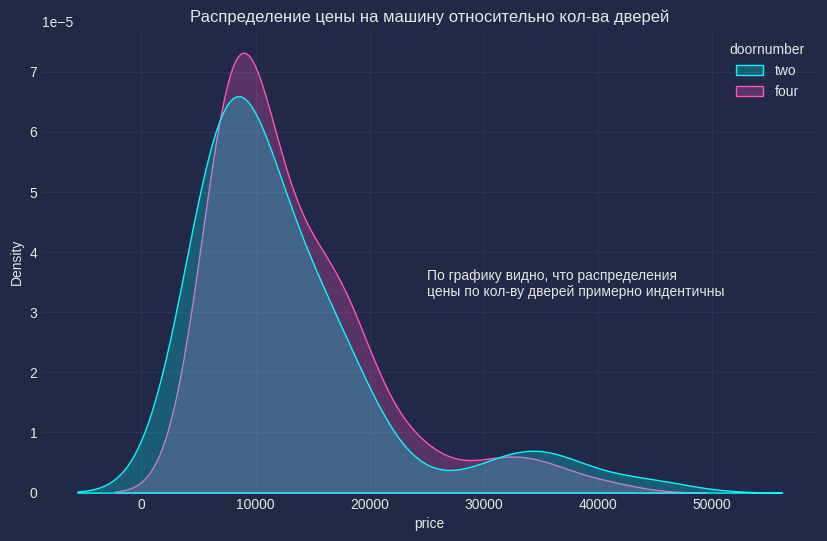

In [7]:
text_for_plot = """
По графику видно, что распределения
цены по кол-ву дверей примерно индентичны
"""

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='price', hue='doornumber', fill=True, common_norm=False)
plt.title('Распределение цены на машину относительно кол-ва дверей')
plt.text(25000, 3e-5, text_for_plot)

plt.show()


Сформулируем гипотезу:
- $H_0:$ Распределения совпадают
- $H_1:$ Распределения не совпадают

Проведем KS-тест, для проверки нашей гипотезы. Проверим её при уровне значимости $\alpha = 0.05$

In [8]:
group1_data = data[data['doornumber'] == 'two']['price']
group2_data = data[data['doornumber'] == 'four']['price']
ks_stat, p_value = ks_2samp(group1_data, group2_data)
print(f'KS statistic for price: {ks_stat}, p-value: {p_value}')

KS statistic for price: 0.16521739130434782, p-value: 0.11081160547163284


Из теста можно сделать вывод о том, что распределения совпадают, так как значение `p-value` $\approx 0.11 > 0.05 = \alpha$

Можно предположить, что отстутсвие статически значимой разницы вызвано тем, что кол-во дверей не влияет значительным образом на распределение цены

##### Распределения длины автомобиля

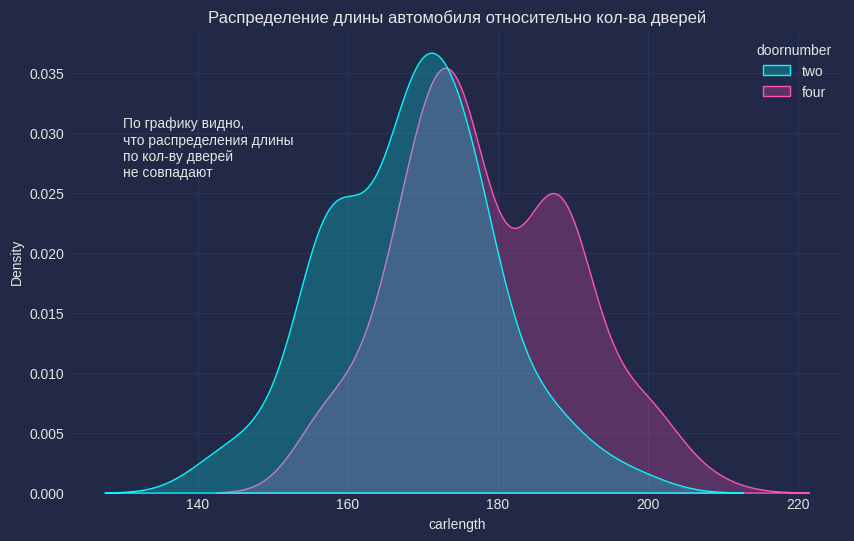

In [9]:
text_for_plot = """
По графику видно, 
что распределения длины 
по кол-ву дверей 
не совпадают
"""

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='carlength', hue='doornumber', fill=True, common_norm=False)
plt.title('Распределение длины автомобиля относительно кол-ва дверей')
plt.text(130, 0.025, text_for_plot)

plt.show()


Снова проведем KS-тест, для проверки гипотезы о том, что распределения совпадают. Проверим её при уровне значимости $\alpha = 0.05$

In [10]:
group1_data = data[data['doornumber'] == 'two']['carlength']
group2_data = data[data['doornumber'] == 'four']['carlength']
ks_stat, p_value = ks_2samp(group1_data, group2_data)
print(f'KS statistic for price: {ks_stat}, p-value: {p_value}')

KS statistic for price: 0.3753623188405797, p-value: 7.265510408251192e-07


Из теста можно убедиться в том, что распределения не совпадают, так как значение `p-value` $\approx 7*10^{-7} < 0.05 = \alpha$

Проверим является ли разница средних в этой группе статистически значимой.
Сформулируем гипотезу:
- $H_0:$ Нет статистически значимых различий между выборками
- $H_1:$ Присутствуют статистически значимые различия между выборками

Для этого проведем тест Манна-Уитни при уровне значимости $\alpha = 0.05$ (так как распределение не похоже на нормальное). 

In [11]:
statistic, p_value = sts.mannwhitneyu(group1_data, group2_data)
print(f'MW statistic: {statistic}, p-value: {p_value}')

MW statistic: 2877.5, p-value: 4.986172954761242e-08


Из теста можно сделать вывод о том, что в выборках присутствуют статистически значимые различия, т.к. `p-value` $\approx 5*10^{-8} < 0.05 = \alpha$

Построим точную оценку разницы групп:

In [12]:
diff_mean = np.mean(group1_data) - np.mean(group2_data)

print(f"Точная оценка разницы между группами: {diff_mean}")

Точная оценка разницы между группами: -9.88425120772942


Построим интервальную оценку для разницы групп:

In [13]:
bootstrapped_diffs = []
for _ in range(1000):
    bootstrap_sample1 = np.random.choice(group1_data, len(group1_data), replace=True)
    bootstrap_sample2 = np.random.choice(group2_data, len(group2_data), replace=True)
    bootstrapped_diffs.append(np.mean(bootstrap_sample1) - np.mean(bootstrap_sample2))

lower_ci, upper_ci = np.percentile(bootstrapped_diffs,q=[2.5, 97.5]).round(2)

print(f"Интервальная оценка разницы между группами: {lower_ci, upper_ci}")

Интервальная оценка разницы между группами: (-13.11, -6.75)


Визуализируем оценки:

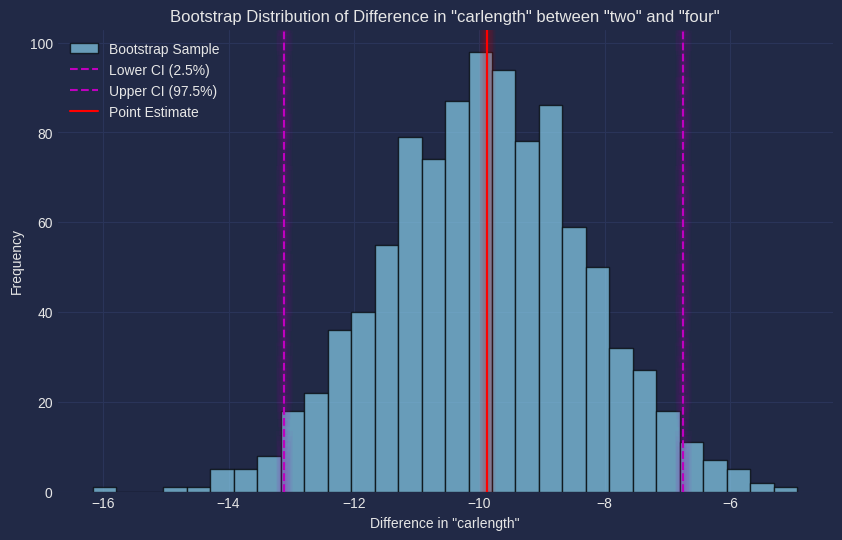

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_diffs, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Bootstrap Sample')
plt.axvline(x=lower_ci, color='m', linestyle='--', label='Lower CI (2.5%)')
plt.axvline(x=upper_ci, color='m', linestyle='--', label='Upper CI (97.5%)')
plt.axvline(x=diff_mean, color='r', linestyle='-', label='Point Estimate')
plt.title(f'Bootstrap Distribution of Difference in "carlength" between "two" and "four"')
plt.xlabel(f'Difference in "carlength"')
plt.ylabel('Frequency')
plt.legend()
mplcyberpunk.add_glow_effects()
plt.show()

В заключении, логично будет предположить, что чем больше дверей у машины, тем больше её длина.

#### 2. Engine Location

Text(0.5, 1.0, 'столбец enginelocation')

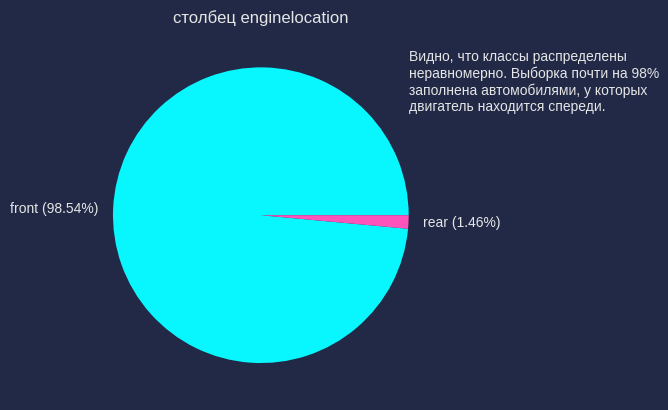

In [15]:
pie_vals_dependents = list(zip(data['enginelocation'].value_counts().index, round(data['enginelocation'].value_counts(normalize=True) * 100, 2).values))

plt.pie(
    data['enginelocation'].value_counts(), 
    labels=[i[0] + f" ({i[1]}%)" for i in pie_vals_dependents]
)
text_for_pie_plot = """
Видно, что классы распределены
неравномерно. Выборка почти на 98%
заполнена автомобилями, у которых 
двигатель находится спереди.
"""
plt.text(1, 0.6, text_for_pie_plot)
plt.title('столбец enginelocation')

##### Распределения цены

Посмотрим на то, как в данных группах распределена цена на автомобиль.

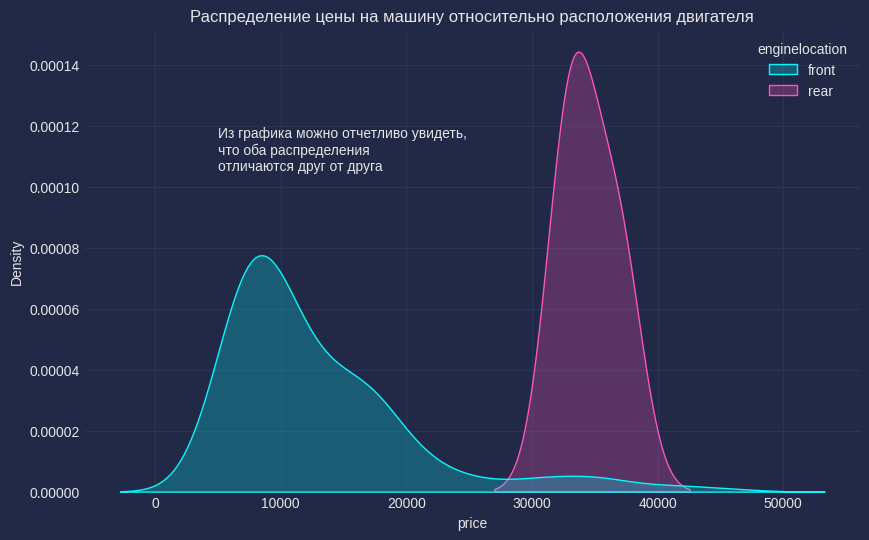

In [16]:
text_for_plot = """
Из графика можно отчетливо увидеть,
что оба распределения 
отличаются друг от друга
"""

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='price', hue='enginelocation', fill=True, common_norm=False)
plt.title('Распределение цены на машину относительно расположения двигателя')
plt.text(5000, 10e-5, text_for_plot)

plt.show()

Для проверки достоверности наших предположений, воспользуемя KS-тестом

In [17]:
group1_data = data[data['enginelocation'] == 'front']['price']
group2_data = data[data['enginelocation'] == 'rear']['price']
ks_stat, p_value = ks_2samp(group1_data, group2_data)
print(f'KS statistic for price: {ks_stat}, p-value: {p_value}')

KS statistic for price: 0.9603960396039604, p-value: 0.00023323038214444745


Значение p-value получилось очень маленьким, что подтверждает наши выводы из графиков

Объяснить такую разницу можно тем, что скорее всего двигатель расположен сзади у автомобилей Premium класс или класса Sport, а цена таких авто обычно выше. Проверить это можно следующим образом: добавить новый признак "Auto_Class" и посмотреть на корреляцию цены автомобилей, у которых двигатель сзади, с автомобилями класса Premium (Sport).

#### 3. Fuel Type

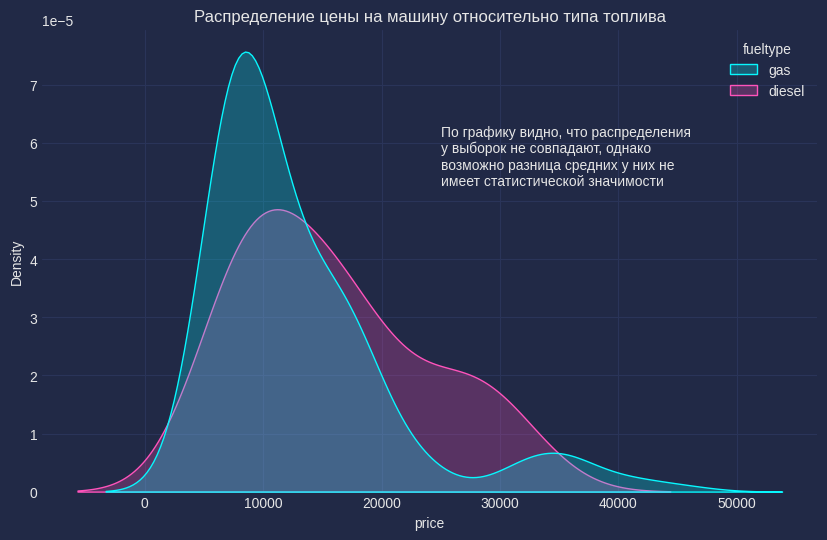

In [18]:
text_for_plot = """
По графику видно, что распределения
у выборок не совпадают, однако
возможно разница средних у них не 
имеет статистической значимости
"""

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='price', hue='fueltype', fill=True, common_norm=False)
plt.title('Распределение цены на машину относительно типа топлива')
plt.text(25000, 5e-5, text_for_plot)

plt.show()

Для начала проведем KS-тест, для проверки гипотезы о том, что распределения не совпадают. Проверим её при уровне значимости $\alpha = 0.05$

In [19]:
group1_data = data[data['fueltype'] == 'gas']['price']
group2_data = data[data['fueltype'] == 'diesel']['price']
ks_stat, p_value = ks_2samp(group1_data, group2_data)
print(f'KS statistic for price: {ks_stat}, p-value: {p_value}')

KS statistic for price: 0.25, p-value: 0.17609050630204018


Т.к. `p-value` $\approx 0.176 > 0.05 = \alpha \Rightarrow $ распределения не совпадают

Далее проверим является ли разница средних в этой группе статистически значимой.

In [20]:
statistic, p_value = sts.mannwhitneyu(group1_data, group2_data)
print(f'MW statistic: {statistic}, p-value: {p_value}')

MW statistic: 1347.0, p-value: 0.04616736846226526


Т.к. `p-value` $\approx 0.046 < 0.05 = \alpha \Rightarrow $ есть статистически значимые различия в выборке.

Точная оценка

In [21]:
diff_mean = np.mean(group1_data) - np.mean(group2_data)

print(f"Точная оценка разницы между группами: {diff_mean}")

Точная оценка разницы между группами: -2838.3518000000004


Интервальные оценки

In [22]:
bootstrapped_diffs = []
for _ in range(1000):
    bootstrap_sample1 = np.random.choice(group1_data, len(group1_data), replace=True)
    bootstrap_sample2 = np.random.choice(group2_data, len(group2_data), replace=True)
    bootstrapped_diffs.append(np.mean(bootstrap_sample1) - np.mean(bootstrap_sample2))

lower_ci, upper_ci = np.percentile(bootstrapped_diffs,q=[2.5, 97.5]).round(2)

print(f"Интервальная оценка разницы между группами: {lower_ci, upper_ci}")

Интервальная оценка разницы между группами: (-6430.48, 844.73)


Визуализируем оценки:

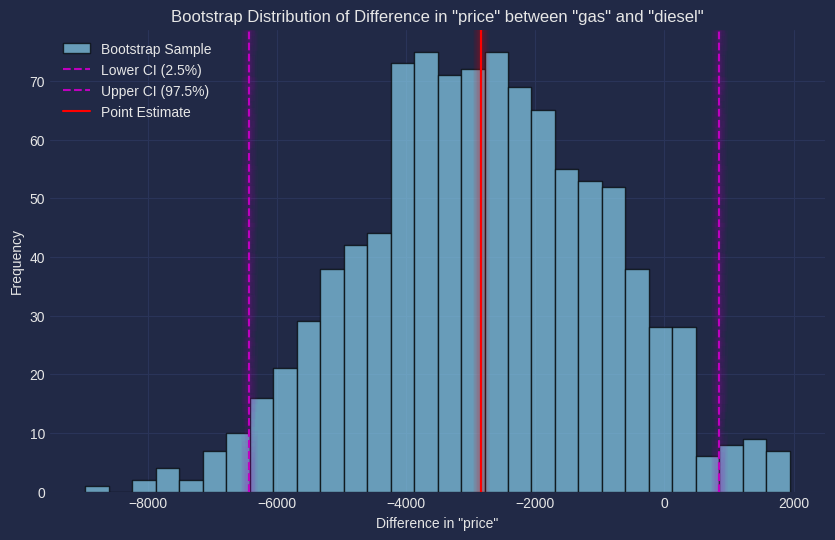

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_diffs, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Bootstrap Sample')
plt.axvline(x=lower_ci, color='m', linestyle='--', label='Lower CI (2.5%)')
plt.axvline(x=upper_ci, color='m', linestyle='--', label='Upper CI (97.5%)')
plt.axvline(x=diff_mean, color='r', linestyle='-', label='Point Estimate')
plt.title(f'Bootstrap Distribution of Difference in "price" between "gas" and "diesel"')
plt.xlabel(f'Difference in "price"')
plt.ylabel('Frequency')
plt.legend()
mplcyberpunk.add_glow_effects()
plt.show()

Можно предположить что разница в выборках объясняется тем, что в среднем автомобили на дизиле стоят немного дороже чем автомобили на бензине.
При этом, интервальная оценка разницы содержит ноль, который может указывать на то, что различия в выборках не на столько значимы.

### Расмотрим оставшиеся признаки

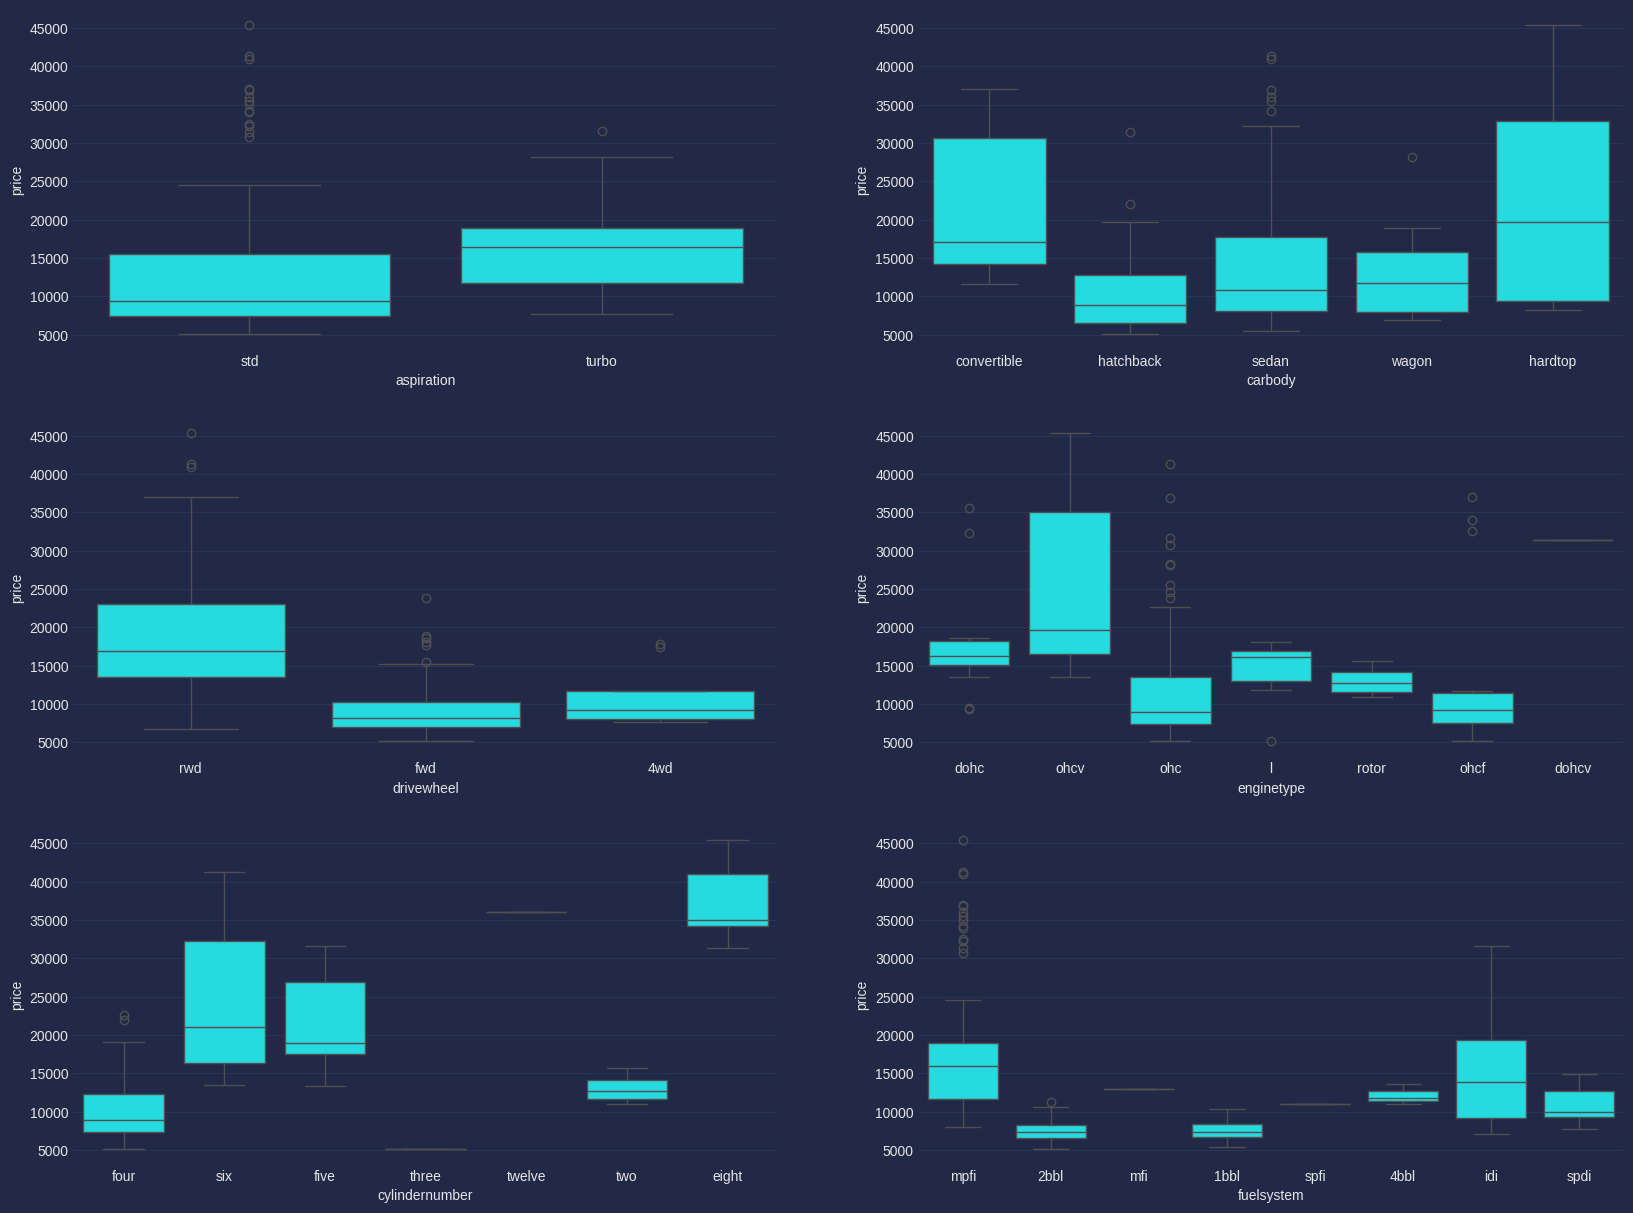

In [24]:
plt.figure(figsize=(20, 15))
plt.subplot(3,2,1)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(3,2,2)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(3,2,3)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(3,2,4)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(3,2,5)
sns.boxplot(x = 'cylindernumber', y = 'price', data = data)
plt.subplot(3,2,6)
sns.boxplot(x = 'fuelsystem', y = 'price', data = data)
plt.show()

Выводы из полученных графиков:
- Все типы кузова автомобилей относительно дешевые. Выделяются только "Convertible" и "Hardtop";
- Цена на автомобили с задним приводом выше всех остальных;
- Присутствует небольная зависимость цены от числа поршней в двигателе;

### Рассмотрим в целом распределения численных признаков

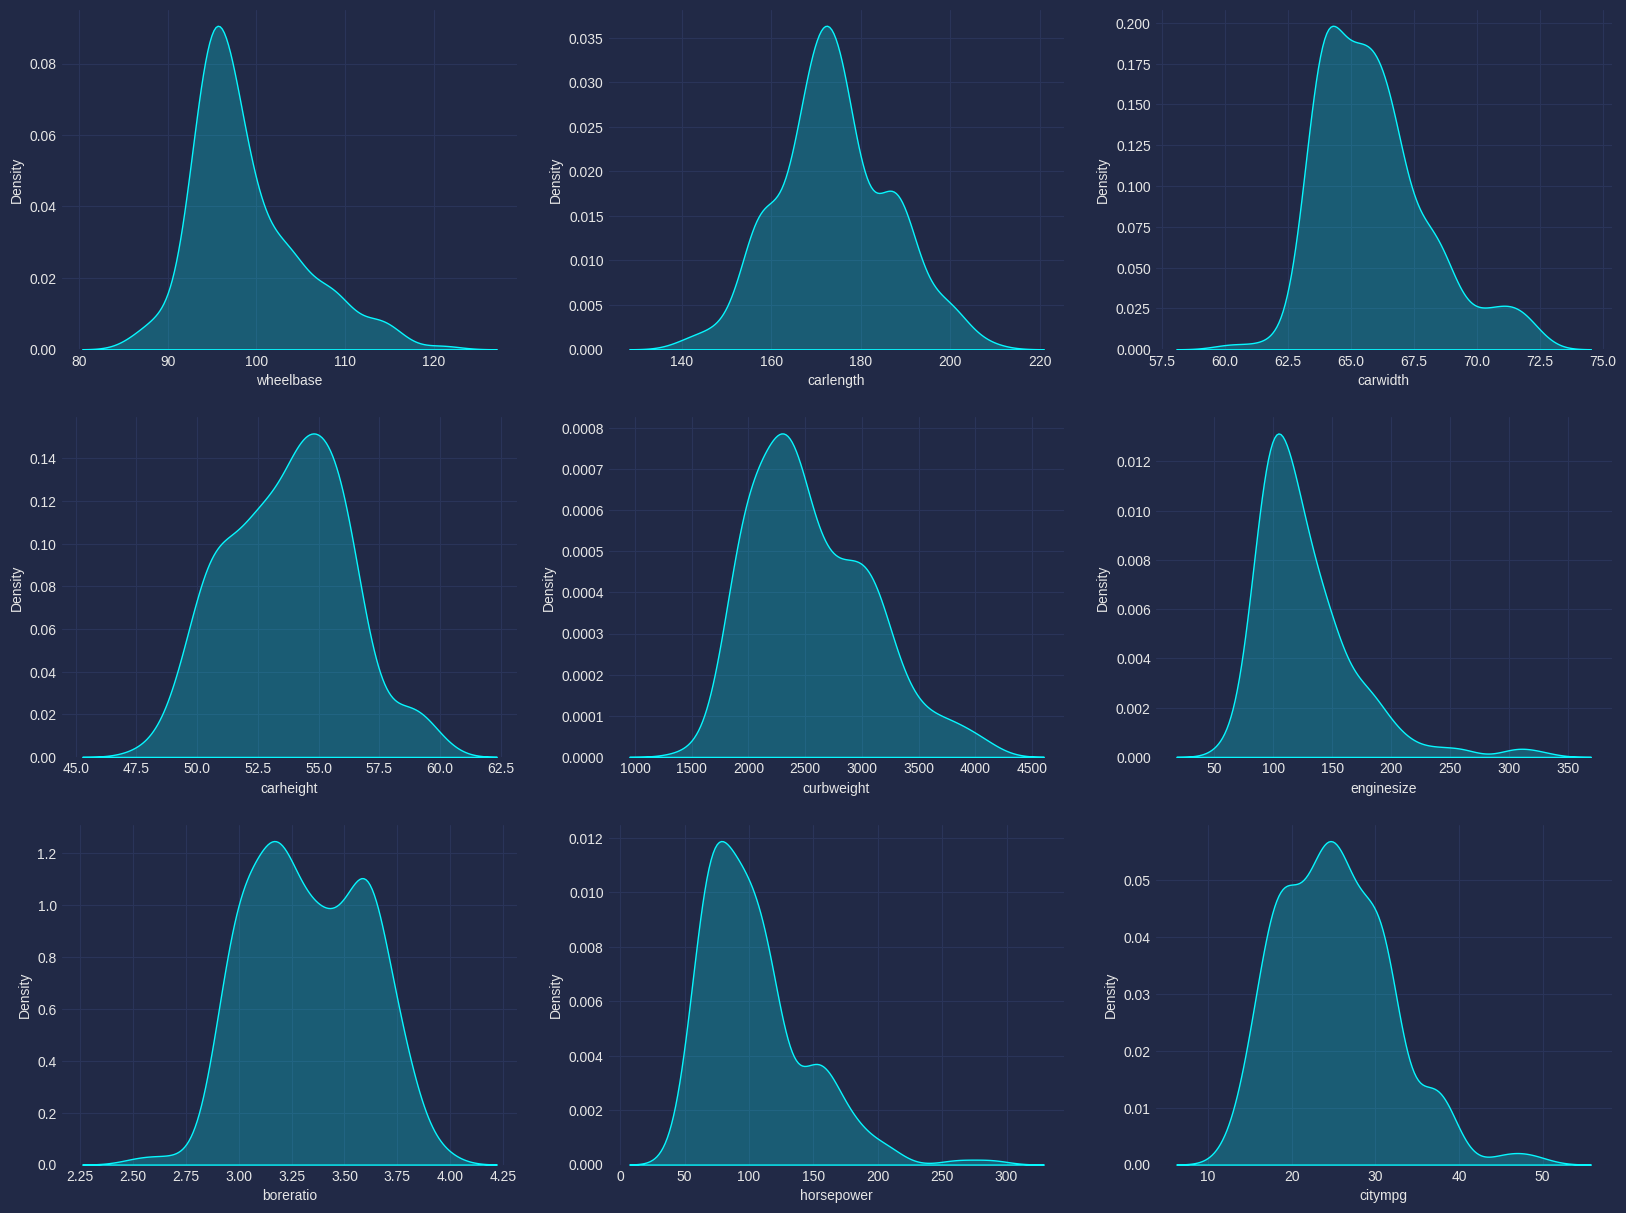

In [25]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.kdeplot(x = 'wheelbase', data = data, fill=True, common_norm=False)
plt.subplot(3,3,2)
sns.kdeplot(x = 'carlength', data = data, fill=True, common_norm=False)
plt.subplot(3,3,3)
sns.kdeplot(x = 'carwidth', data = data, fill=True, common_norm=False)
plt.subplot(3,3,4)
sns.kdeplot(x = 'carheight', data = data, fill=True, common_norm=False)
plt.subplot(3,3,5)
sns.kdeplot(x = 'curbweight', data = data, fill=True, common_norm=False)
plt.subplot(3,3,6)
sns.kdeplot(x = 'enginesize', data = data, fill=True, common_norm=False)
plt.subplot(3,3,7)
sns.kdeplot(x = 'boreratio', data = data, fill=True, common_norm=False)
plt.subplot(3,3,8)
sns.kdeplot(x = 'horsepower', data = data, fill=True, common_norm=False)
plt.subplot(3,3,9)
sns.kdeplot(x = 'citympg', data = data, fill=True, common_norm=False)

plt.show()

Распределения не похожи на нормальные. Можно применить методы, позволяющие преобразовать исходную «ненормальную статистику» в «нормальную» (например Бокса-Кокса).

### Исследуем на мультиколлинеарность

Выпишем численные признаки

In [26]:
num_cols = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','horsepower','peakrpm','citympg','price']

Построим матрицу корреляции для численных признаков

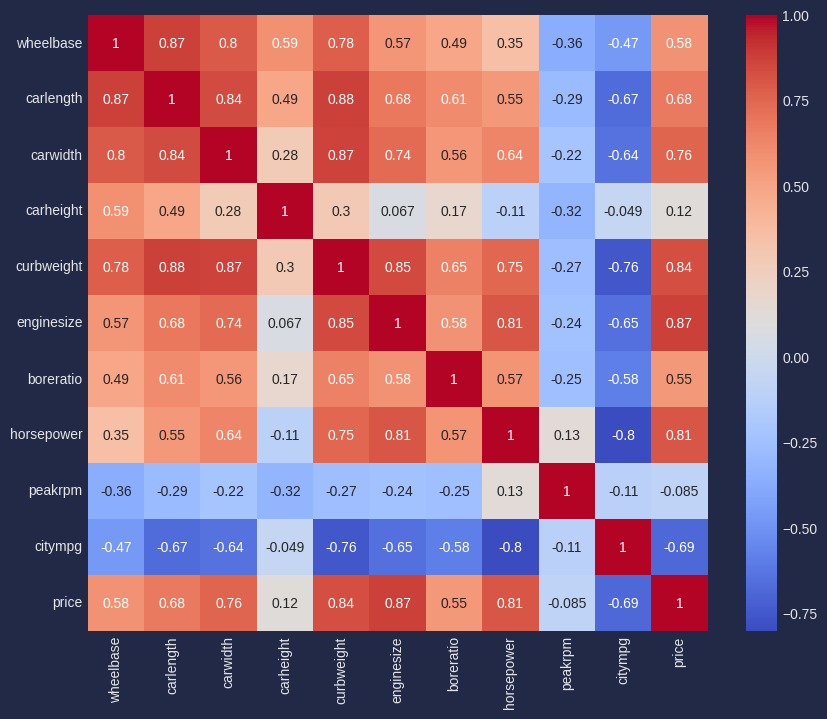

In [27]:
cor = data[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor, cmap='coolwarm', annot=True);

Можно увидеть, что есть признаки, у которых довольно высокий показатель корреляции. Возможно не стоит учитывать такие признаки при построении модели.

## 4. Data Preparation

### Обработаем категориальные признаки

Так как разница в выборках по цене относительно кол-ва дверей незначительная, можно этот признак исключить из выборки

In [28]:
prepared_data = data.drop('doornumber',axis=1)

Так же можно перенести `"Число поршней"` из пространства категориальных признаков в численные

In [29]:
cylindernumber_dict = {
    "four": 4,
    "six": 6,
    "five": 5,
    "three": 3,
    "twelve": 12,
    "two": 2,
    "eight": 8
}

prepared_data['cylindernumber'] = prepared_data['cylindernumber'].replace(cylindernumber_dict)
num_cols += ['cylindernumber']
prepared_data['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

Так же можно добавить три бинарных признака `is_rear_engine_lication`, `convertible_or_hardtop` и `is_rwd`

In [30]:
drivewheel_dict = {
    "rwd": 1,
    "fwd": 0,
    "4wd": 0
}
prepared_data['is_rwd'] = prepared_data['drivewheel'].replace(drivewheel_dict)

enginelocation_dict = {
    "rear": 1,
    "front": 0
}
prepared_data['is_rear_engine_lication'] = prepared_data['enginelocation'].replace(enginelocation_dict)

carbody_dict = {
    "convertible": 1,
    "hardtop": 1,
    "hatchback": 0,
    "sedan": 0,
    "wagon": 0,
}
prepared_data['convertible_or_hardtop'] = prepared_data['carbody'].replace(carbody_dict)


### Обработаем численные признаки

Применим преобразование Бокса-Кокса

In [31]:
for feat in num_cols:
    prepared_data[feat], _ = boxcox(prepared_data[feat]) 


Отнормируем признаки:

In [32]:
scaler = StandardScaler()
prepared_data[num_cols] = scaler.fit_transform(prepared_data[num_cols])

## 5. Регрессионный анализ

#### 1 модель

Попробуем сначала построить модель, не избавляясь от линейно-зависимых признаков

In [33]:
features = num_cols+['is_rwd', 'is_rear_engine_lication', 'convertible_or_hardtop']

X = sm.add_constant(prepared_data[features].drop('price',axis=1))
model_1 = sm.OLS(prepared_data['price'], X).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     107.1
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           2.99e-80
Time:                        16:54:24   Log-Likelihood:                -74.068
No. Observations:                 205   AIC:                             176.1
Df Residuals:                     191   BIC:                             222.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0979      0.037     -2.613      0.010      -0.172      -0.024
wheelbase                   0.0239      0.063      0.376      0.707      -0.101       0.149
carlength                   0.1403      0.080      1.756      0.081      -0.017       0.298
carwidth                 3.719e-16   1.06e-16      3.521      0.001    1.64e-16     5.8e-16
carheight                  -0.0114      0.038     -0.299      0.765      -0.087       0.064
curbweight                  0.5456      0.097      5.644      0.000       0.355       0.736
enginesize                 -0.0723      0.104     -0.697      0.487      -0.277       0.132
boreratio                  -0.0678      0.044     -1.531      0.127      -0.155       0.020
horsepower                  0.2887      0.086      3.353      0.001       0.119       0.459
peakrpm                     0.0065      0.038      0.171      0.865      -0.069       0.082
citympg                    -0.0100      0.071     -0.141      0.888      -0.150       0.130
cylindernumber              0.0272      0.054      0.504      0.615      -0.079       0.134
is_rwd                      0.1935      0.078      2.493      0.014       0.040       0.347
is_rear_engine_lication     0.9226      0.269      3.427      0.001       0.392       1.454
convertible_or_hardtop      0.1856      0.123      1.509      0.133      -0.057       0.428
==============================================================================
Omnibus:                        1.122   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                0.787
Skew:                           0.060   Prob(JB):                        0.675
Kurtosis:                       3.279   Cond. No.                     7.39e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Отрисуем предсказанные и реальные значения таргета

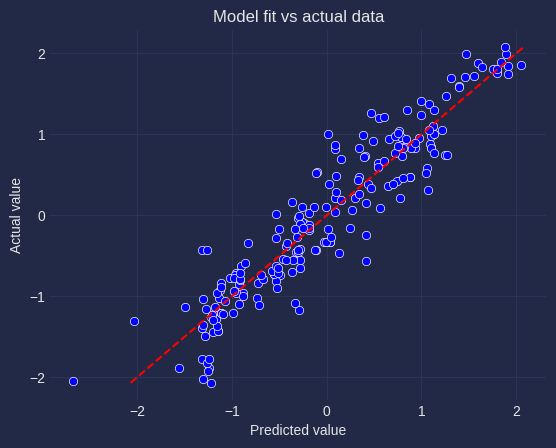

In [34]:
sns.scatterplot(x=model_1.fittedvalues, y=prepared_data['price'], c='b');
sns.lineplot(x=prepared_data['price'], y=prepared_data['price'], c='r', linestyle='--');
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Model fit vs actual data')

plt.show()

Также посмотрим на распределение остатков модели

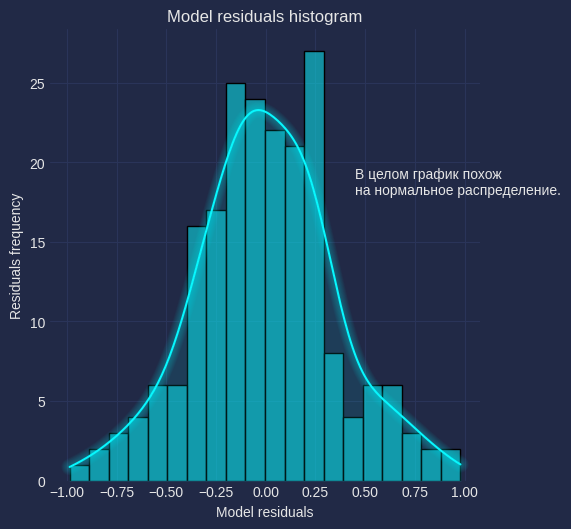

In [35]:
text_for_plot = """
В целом график похож 
на нормальное распределение.
"""

sns.displot(model_1.resid, bins=20, kde=True);
mplcyberpunk.add_glow_effects()
plt.xlabel('Model residuals')
plt.ylabel('Residuals frequency')
plt.title('Model residuals histogram')
plt.text(0.45, 17, text_for_plot)
plt.show()

Проведем проверку на гетероскедатичность. Для этого сформулируем две гипотезы:
- $H_0:$ Гетероскедатичность отсутствует
- $H_1:$ Присутствует гетероскедатичность

Проверим их с помощью теста Уайта

In [36]:
vals = het_white(model_1.resid, X)
print("p-value теста Уайта:", vals[1])

p-value теста Уайта: 0.0030673067147033188


Т. к. `p-value` $\approx 0.003$ делаем вывод о том, что в данных присутствует гетероскедатичность. 

#### Модель 2

Построим вспомогательную модель с помощью Lasso регуляризации для отбора признаков

In [37]:
X = sm.add_constant(prepared_data[num_cols].drop('price',axis=1))
model_lasso = sm.OLS(prepared_data['price'], X).fit_regularized(method='elastic_net', alpha=0.05, L1_wt=1)
model_lasso.params

const             0.000000
wheelbase         0.000000
carlength         0.016298
carwidth          0.000000
carheight         0.000000
curbweight        0.594701
enginesize        0.000000
boreratio         0.000000
horsepower        0.305609
peakrpm           0.000000
citympg           0.000000
cylindernumber    0.000000
dtype: float64

Выберем те признаки, которые не зануляются

In [38]:
features = ['carlength', 'curbweight', 'horsepower', 'is_rear_engine_lication']


In [39]:
X = sm.add_constant(prepared_data[features])
model_2 = sm.OLS(prepared_data['price'], X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     334.0
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           2.55e-87
Time:                        16:54:25   Log-Likelihood:                -81.918
No. Observations:                 205   AIC:                             173.8
Df Residuals:                     200   BIC:                             190.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0146      0.026     -0.566      0.572      -0.065       0.036
carlength                   0.1009      0.060      1.695      0.092      -0.016       0.218
curbweight                  0.5719      0.076      7.567      0.000       0.423       0.721
horsepower                  0.2922      0.046      6.362      0.000       0.202       0.383
is_rear_engine_lication     0.9944      0.226      4.393      0.000       0.548       1.441
==============================================================================
Omnibus:                        1.989   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.370   Jarque-Bera (JB):                1.645
Skew:                           0.202   Prob(JB):                        0.439
Kurtosis:                       3.174   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

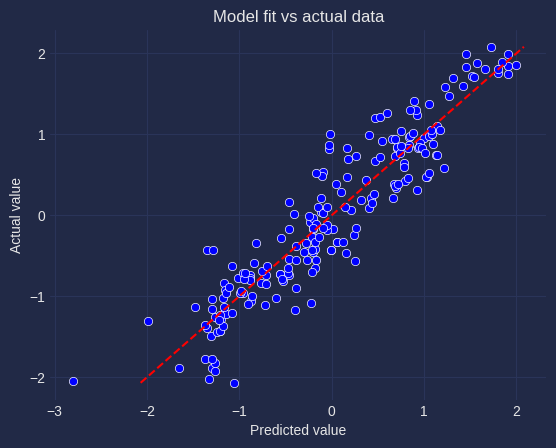

In [40]:
sns.scatterplot(x=model_2.fittedvalues, y=prepared_data['price'], c='b');
sns.lineplot(x=prepared_data['price'], y=prepared_data['price'], c='r', linestyle='--');
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Model fit vs actual data')

plt.show()

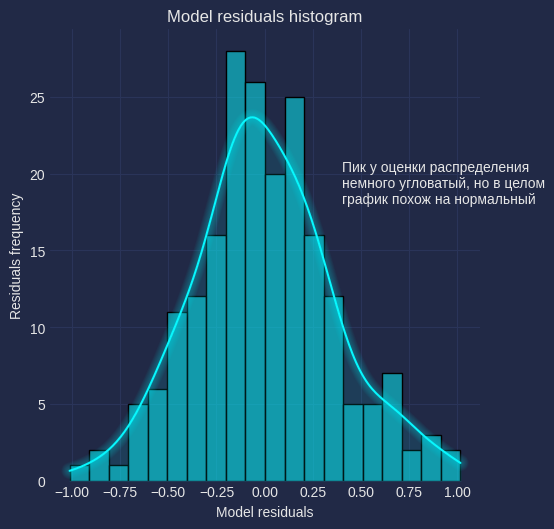

In [41]:
text_for_plot = """
Пик у оценки распределения
немного угловатый, но в целом
график похож на нормальный
"""

sns.displot(model_2.resid, bins=20, kde=True);
mplcyberpunk.add_glow_effects()
plt.xlabel('Model residuals')
plt.ylabel('Residuals frequency')
plt.title('Model residuals histogram')
plt.text(0.4, 17, text_for_plot)
plt.show()

In [42]:
vals = het_white(model_2.resid, X)
print("p-value теста Уайта:", vals[1])

p-value теста Уайта: 0.48122701677211477


В этот раз результат теста Уайта указывает на наличие гомоскедатичности.

## Заключение

В качестве финальной модели выбрана модель №2. Эта модель получилась единственной, у которой результат теста на проверку наличия гомоскедатичности показал положительный результат. У модели №1 коэффициент $R^2$, который показывает на сколько результат модели коррелирует с целевой переменной, оказался выше, но не намного по сравнению со второй. Разница составляет $\approx 0.01$. Кроме того метрики AIC и BIC у второй модели оказались ниже, чем у первой, что показывает хорошее соотношение между подгонкой данных и сложностью модели.